In [ ]:
import pandas as pd

# Parameters
target_feb_2025 = 2096165.74  # Used space in MB as of Feb 2025
growth_per_day_pct = 0.10 / 100  # Daily growth rate (converted to decimal)
growth_per_week_pct = 0.67 / 100  # Weekly growth rate (converted to decimal)
days_in_month = 30  # Approximate number of days in a month
weeks_in_month = 4  # Approximate number of weeks in a month
additional_space_gb = 316  # Additional space in GB to add to the used space
additional_space_mb = additional_space_gb * 1024  # Convert GB to MB

# Initialize the list for the dataset
data = []

# Start from February 2025 and work backward to September 2022
current_used_space = target_feb_2025
months = ['2025-02', '2025-01', '2024-12', '2024-11', '2024-10', '2024-09',
          '2024-08', '2024-07', '2024-06', '2024-05', '2024-04', '2024-03',
          '2024-02', '2023-12', '2023-11', '2023-10', '2023-09', '2023-08',
          '2023-07', '2023-06', '2023-05', '2023-04', '2023-03', '2023-02',
          '2023-01', '2022-12', '2022-11', '2022-10', '2022-09']

# Loop through the months backwards and calculate the used space for each month
for month in months:
    # Calculate the mount point size by adding the additional space to the current used space
    mount_point_size = current_used_space + additional_space_mb

    # Convert used space and mount point size from MB to GB
    used_space_gb = current_used_space / 1024  # Convert MB to GB
    mount_point_size_gb = mount_point_size / 1024  # Convert MB to GB

    # Store the current used space and mount point size in GB
    data.append([month, round(used_space_gb, 2), round(mount_point_size_gb, 2)])

    # Calculate the used space for the previous month by reversing the growth rates
    # Apply daily and weekly growth for the next month (moving backwards)
    current_used_space = current_used_space / ((1 + growth_per_day_pct) ** days_in_month)  # Reverse daily growth
    current_used_space = current_used_space / ((1 + growth_per_week_pct) ** weeks_in_month)  # Reverse weekly growth

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['Date', 'Used Space (GB)', 'Mount Point Size (GB)'])

# Display the dataset
print(df)


       Date  Used Space (GB)  Mount Point Size (GB)
0   2025-02          2047.04                2363.04
1   2025-01          1934.21                2250.21
2   2024-12          1827.60                2143.60
3   2024-11          1726.86                2042.86
4   2024-10          1631.68                1947.68
5   2024-09          1541.75                1857.75
6   2024-08          1456.77                1772.77
7   2024-07          1376.47                1692.47
8   2024-06          1300.60                1616.60
9   2024-05          1228.92                1544.92
10  2024-04          1161.18                1477.18
11  2024-03          1097.18                1413.18
12  2024-02          1036.70                1352.70
13  2023-12           979.56                1295.56
14  2023-11           925.57                1241.57
15  2023-10           874.55                1190.55
16  2023-09           826.35                1142.35
17  2023-08           780.80                1096.80
18  2023-07 

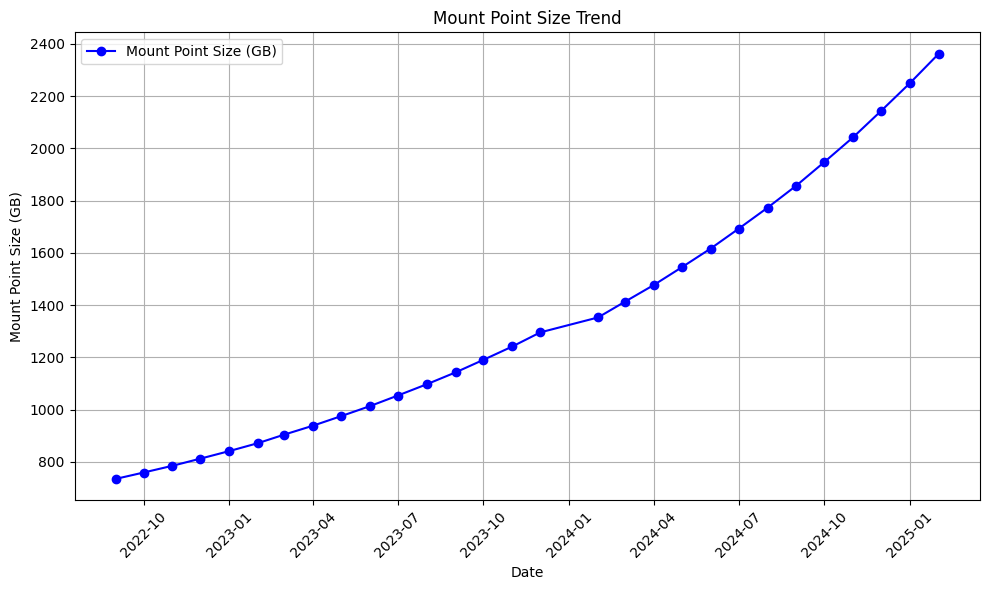

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Plot the Mount Point Trend
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Mount Point Size (GB)'], marker='o', color='b', label='Mount Point Size (GB)')
plt.title('Mount Point Size Trend')
plt.xlabel('Date')
plt.ylabel('Mount Point Size (GB)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Assuming your dataset is in a dataframe named 'data'
data = pd.DataFrame({
    'Date': ['2025-02', '2025-01', '2024-12', '2024-11', '2024-10', '2024-09', '2024-08', '2024-07', '2024-06', '2024-05',
             '2024-04', '2024-03', '2024-02', '2023-12', '2023-11', '2023-10', '2023-09', '2023-08', '2023-07', '2023-06',
             '2023-05', '2023-04', '2023-03', '2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09'],
    'Used Space (GB)': [2047.04, 1934.21, 1827.60, 1726.86, 1631.68, 1541.75, 1456.77, 1376.47, 1300.60, 1228.92, 1161.18, 1097.18,
                         1036.70, 979.56, 925.57, 874.55, 826.35, 780.80, 737.77, 697.10, 658.68, 622.37, 588.07, 555.66, 525.03,
                         496.09, 468.75, 442.91, 418.50],
    'Mount Point Size (GB)': [2363.04, 2250.21, 2143.60, 2042.86, 1947.68, 1857.75, 1772.77, 1692.47, 1616.60, 1544.92, 1477.18, 1413.18,
                               1352.70, 1295.56, 1241.57, 1190.55, 1142.35, 1096.80, 1053.77, 1013.10, 974.68, 938.37, 904.07, 871.66,
                               841.03, 812.09, 784.75, 758.91, 734.50]
})

# Reverse the order of the rows
data_reversed = data[::-1].reset_index(drop=True)

print(data_reversed)


       Date  Used Space (GB)  Mount Point Size (GB)
0   2022-09           418.50                 734.50
1   2022-10           442.91                 758.91
2   2022-11           468.75                 784.75
3   2022-12           496.09                 812.09
4   2023-01           525.03                 841.03
5   2023-02           555.66                 871.66
6   2023-03           588.07                 904.07
7   2023-04           622.37                 938.37
8   2023-05           658.68                 974.68
9   2023-06           697.10                1013.10
10  2023-07           737.77                1053.77
11  2023-08           780.80                1096.80
12  2023-09           826.35                1142.35
13  2023-10           874.55                1190.55
14  2023-11           925.57                1241.57
15  2023-12           979.56                1295.56
16  2024-02          1036.70                1352.70
17  2024-03          1097.18                1413.18
18  2024-04 

In [ ]:
# Save to CSV
data_reversed.to_csv('generated_data.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

df=df

# Convert 'date' column to datetime format
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

# Use only the 'mount_point_size' column for prediction
data = data_reversed[['Date', 'Mount Point Size (GB)']].set_index('Date')

# Normalize the 'mount_point_size' data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Mount Point Size (GB)']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    x_data, y_data = [], []
    for i in range(seq_length, len(data)):
        x_data.append(data[i-seq_length:i, 0])  # Past `seq_length` months
        y_data.append(data[i, 0])  # Next month
    return np.array(x_data), np.array(y_data)

# Set the sequence length (e.g., use 3 months to predict the next month)
seq_length = 6
x, y = create_sequences(scaled_data, seq_length)

# Reshape input to be [samples, time steps, features]
x = x.reshape(x.shape[0], x.shape[1], 1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# Check the shape of the data
print(f"Training set size: {x_train.shape}, Test set size: {x_test.shape}")


Training set size: (18, 6, 1), Test set size: (5, 6, 1)


In [ ]:
# Define the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=200, return_sequences=False, input_shape=(x_train.shape[1], 1)))

# Add Dense layer for regression output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summarize the model
model.summary()
# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_test, y_test), verbose=1)

# Predict on the test set
y_pred = model.predict(x_test)

# Inverse transform the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 200)                 │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,801 (632.04 KB)

 Trainable params: 161,801 (632.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - loss: 0.3487 - val_loss: 2.3951
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2418 - val_loss: 1.9652
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1868 - val_loss: 1.5636
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.1391 - val_loss: 1.2305
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1389 - val_loss: 0.9913
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1148 - val_loss: 0.8453
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1059 - val_loss: 0.7413
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0856 - val_loss: 0.6720
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0662 - val_loss: 0.6067
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0589 - val_loss: 0.5199
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0443 - val_loss: 0.4045
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0320 - val_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to predict future values step-by-step using the trained model
def predict_future(model, input_data, scaler, seq_length, future_months):
    predictions = []
    current_input = input_data[-seq_length:]  # Start with the last `seq_length` data points

    for _ in range(future_months):
        # Reshape current input to be in the shape [samples, time steps, features]
        current_input = current_input.reshape((1, seq_length, 1))

        # Predict the next month's value
        next_month_pred = model.predict(current_input, verbose=0)

        # Inverse transform the prediction to get it back to the original scale
        next_month_pred_inv = scaler.inverse_transform(next_month_pred)

        # Append the predicted value to the list of predictions
        predictions.append(next_month_pred_inv[0, 0])

        # Update the input data for the next prediction by appending the predicted value
        current_input = np.append(current_input[0][1:], next_month_pred, axis=0)

    return predictions

# Define the number of future months to predict (from March 2025 to December 2025)
future_months = 10

# Get the predictions for the next 9 months (March to December 2025)
predicted_values = predict_future(model, scaled_data, scaler, seq_length, future_months)

# Define the starting month (March 2025)
start_date = pd.to_datetime("2025-03-01")

# Generate a list of future months
future_months_list = pd.date_range(start=start_date, periods=future_months, freq='MS')

# Convert to string format 'YYYY-MM' for plotting
future_months_str = future_months_list.strftime('%Y-%m').tolist()

# Print the predicted values for the next 9 months
print(f"Predicted 'Mount Point Size (GB)' for the next {future_months} months:")
for i, val in enumerate(predicted_values, 1):
    print(f"Month {future_months_str[i-1]}: {val:.2f} GB")

Predicted 'Mount Point Size (GB)' for the next 10 months:
Month 2025-03: 2412.91 GB
Month 2025-04: 2506.71 GB
Month 2025-05: 2593.87 GB
Month 2025-06: 2675.13 GB
Month 2025-07: 2750.27 GB
Month 2025-08: 2818.81 GB
Month 2025-09: 2880.23 GB
Month 2025-10: 2939.87 GB
Month 2025-11: 2992.89 GB
Month 2025-12: 3040.08 GB


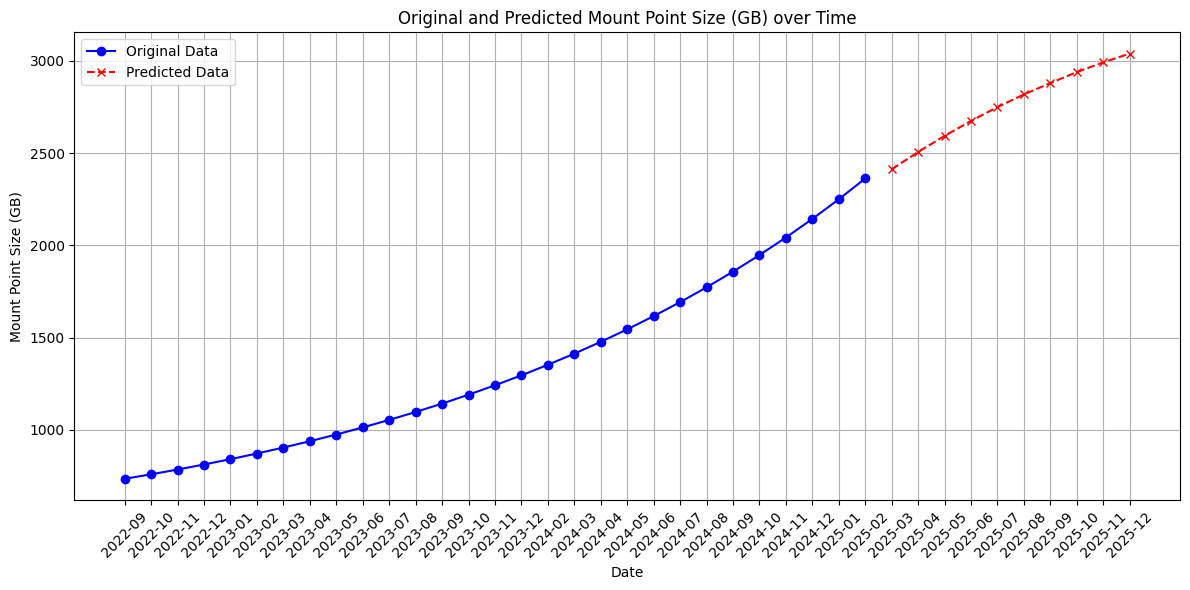

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Original dataset (as per your provided data)
data = {
    'Date': ['2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-02', '2024-03', '2024-04', '2024-05',
             '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02'],
    'Mount Point Size (GB)': [734.50, 758.91, 784.75, 812.09, 841.03, 871.66, 904.07, 938.37, 974.68, 1013.10,
                              1053.77, 1096.80, 1142.35, 1190.55, 1241.57, 1295.56, 1352.70, 1413.18, 1477.18, 1544.92,
                              1616.60, 1692.47, 1772.77, 1857.75, 1947.68, 2042.86, 2143.60, 2250.21, 2363.04]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Predicted values for the next 9 months
predicted_months = ['2025-03', '2025-04', '2025-05', '2025-06', '2025-07', '2025-08', '2025-09', '2025-10', '2025-11','2025-12']
predicted_values = [2412.91, 2506.71, 2593.87, 2675.13, 2750.27, 2818.81, 2880.23, 2939.87, 2992.89,3040.08 ]

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Mount Point Size (GB)'], label='Original Data', color='blue', marker='o')

# Plot the predicted data for the next 9 months
plt.plot(predicted_months, predicted_values, label='Predicted Data', color='red', linestyle='--', marker='x')

# Add labels and title
plt.title('Original and Predicted Mount Point Size (GB) over Time')
plt.xlabel('Date')
plt.ylabel('Mount Point Size (GB)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
